## Roll number: 20BCE140

## Name: Lav Panchal

## Course: Digital Image Processing

## Sem-7

## Practical 5

### Aim: To implement Histogram Equalization and Histogram Matching

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def ImageDisplayFunc(Image, ImageSizeTuple):
    plt.figure(figsize = ImageSizeTuple)
    plt.imshow(Image)
    plt.show()

## Histogram Equalization

In [2]:
img = cv.imread('C:\\Users\\ASHOK\\Desktop\\Python files\\Image Processing\\Grayscale image 2.png')

ImageMatrix = list(img)

PixelDimensions = img.shape

b = PixelDimensions[0]
l = PixelDimensions[1]

### Original grayscale image

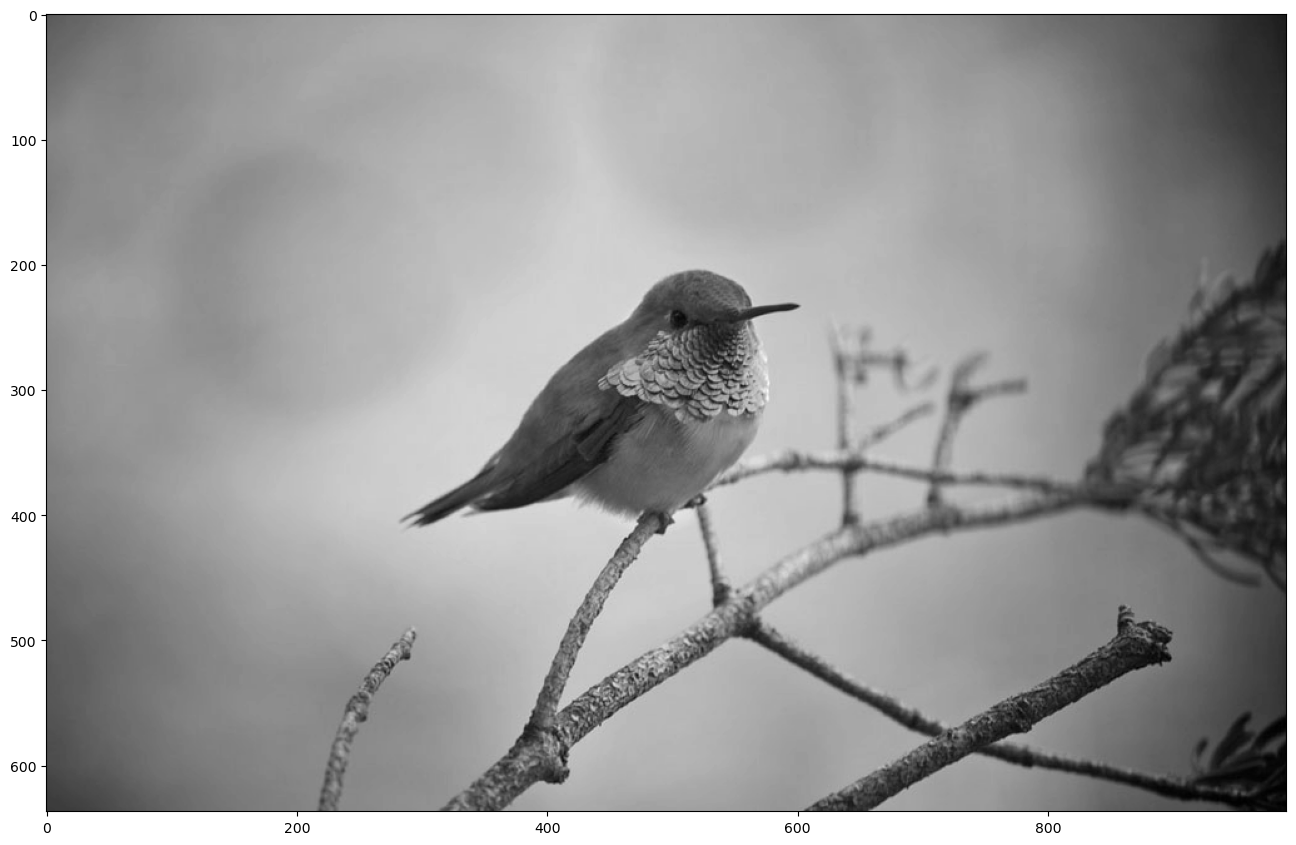

In [3]:
ImageDisplayFunc(img, (16, 12))

In [4]:
PixelDistribution = []

for p in range(0, 256):
    PixelDistribution.append(0)
    
for i in range(0, b):
    ImageRow = ImageMatrix[i]
    for j in range(0, l):
        Pixel = ImageRow[j]
        GrayLevel = Pixel[0]
        PixelDistribution[GrayLevel] = PixelDistribution[GrayLevel] + 1

### Histogram of original Grayscale image pixel intensity distribution

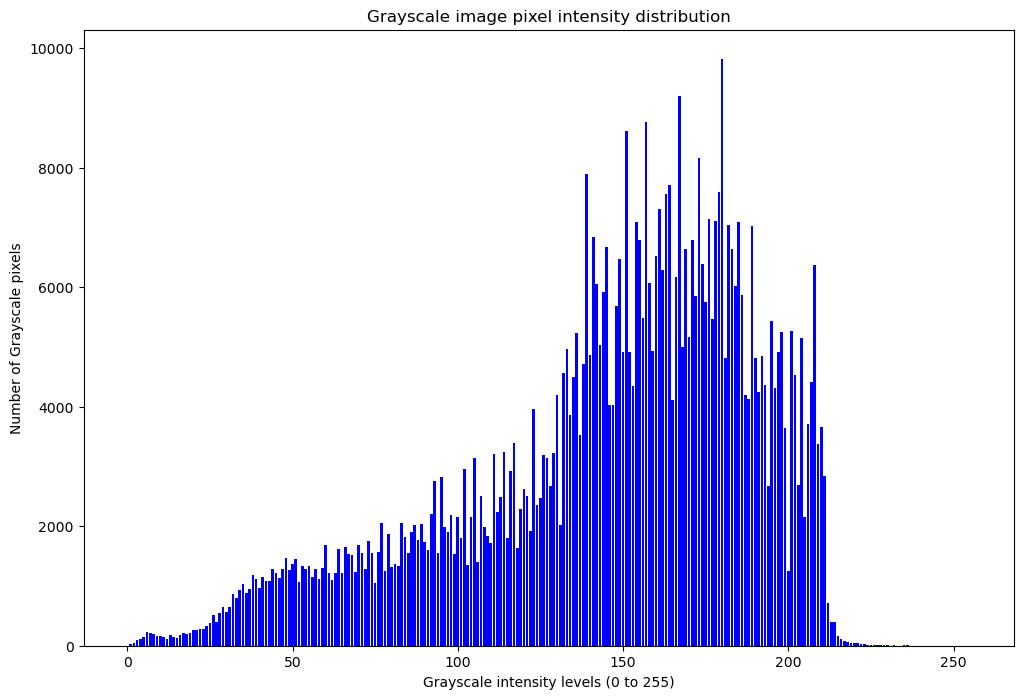

In [5]:
GrayscalePixelLevels = []

for i in range(0, 256):
    GrayscalePixelLevels.append(i)
    
X_axis = GrayscalePixelLevels
Y_axis = PixelDistribution

fig = plt.figure(figsize = (12, 8))

plt.bar(X_axis, Y_axis, color = 'blue', width = 0.8)

plt.xlabel('Grayscale intensity levels (0 to 255)')
plt.ylabel('Number of Grayscale pixels')
plt.title('Grayscale image pixel intensity distribution')

plt.show()

In [6]:
CumulativePixelDistribution = []
CumulativeDistributionFunction = []

val = 0
NumberOfPixels = l * b

for num in PixelDistribution:
    val = val + num
    CumulativePixelDistribution.append(val)
    CumulativeDistributionFunction.append(round((val / NumberOfPixels), 4))

### Line graph of Cumulative Distribution Function of Original grayscale image

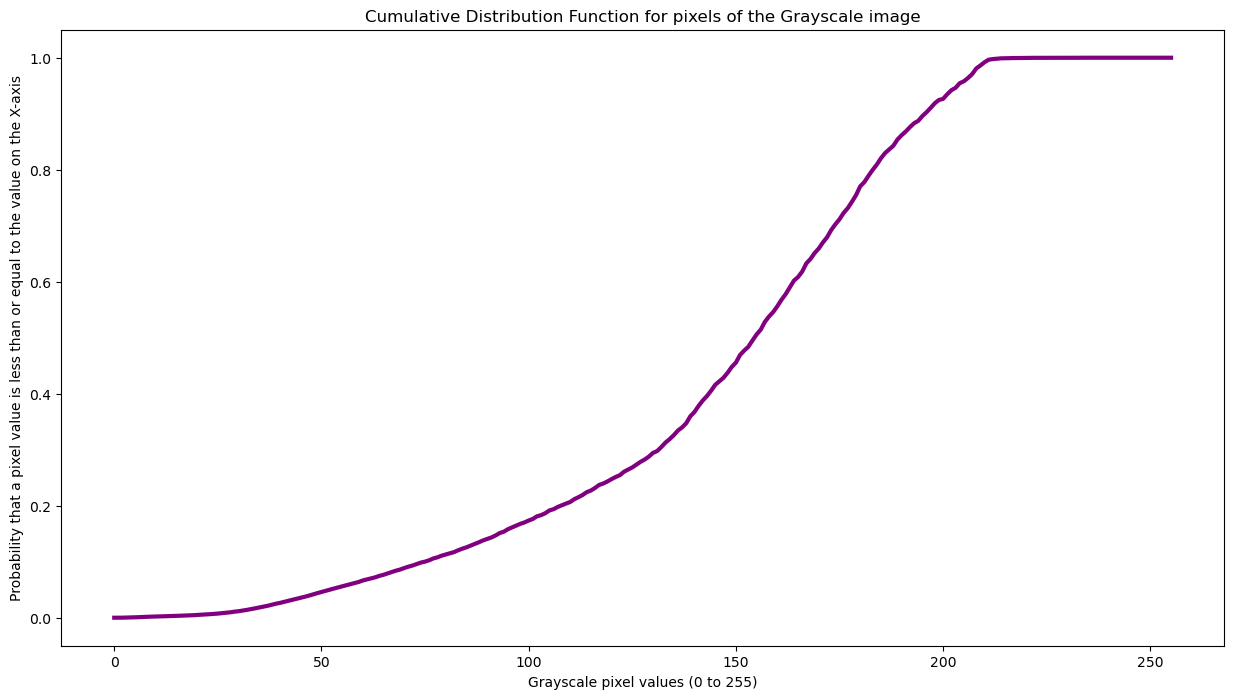

In [7]:
X_axis = GrayscalePixelLevels
Y_axis = CumulativeDistributionFunction

fig = plt.figure(figsize = (15, 8))

plt.plot(X_axis, Y_axis, linestyle = '-', linewidth = 3, color = 'purple')

plt.xlabel('Grayscale pixel values (0 to 255)')
plt.ylabel('Probability that a pixel value is less than or equal to the value on the X-axis')
plt.title('Cumulative Distribution Function for pixels of the Grayscale image')

plt.show()

In [8]:
OutputGrayLevels = []

for val in CumulativePixelDistribution:
    level = round((val / NumberOfPixels) * 255)
    OutputGrayLevels.append(level)
    

ProcessedImageMatrix = []

NewPixelDistribution = []

for p in range(0, 256):
    NewPixelDistribution.append(0)


for i in range(0, b):
    ImageRow = ImageMatrix[i]
    ProcessedImageRow = []
    for j in range(0, l):
        Pixel = ImageRow[j]
        NewPixel = []
        OriginalGrayscaleValue = Pixel[0]
        NewGrayscaleValue = OutputGrayLevels[OriginalGrayscaleValue]
        NewPixelDistribution[NewGrayscaleValue] = NewPixelDistribution[NewGrayscaleValue] + 1 
        for k in range(0, 3):
            NewPixel.append(NewGrayscaleValue)
        ProcessedImageRow.append(NewPixel)
    ProcessedImageMatrix.append(ProcessedImageRow)
    

ProcessedImage = np.array(ProcessedImageMatrix)

### Histogram equalized Grayscale image

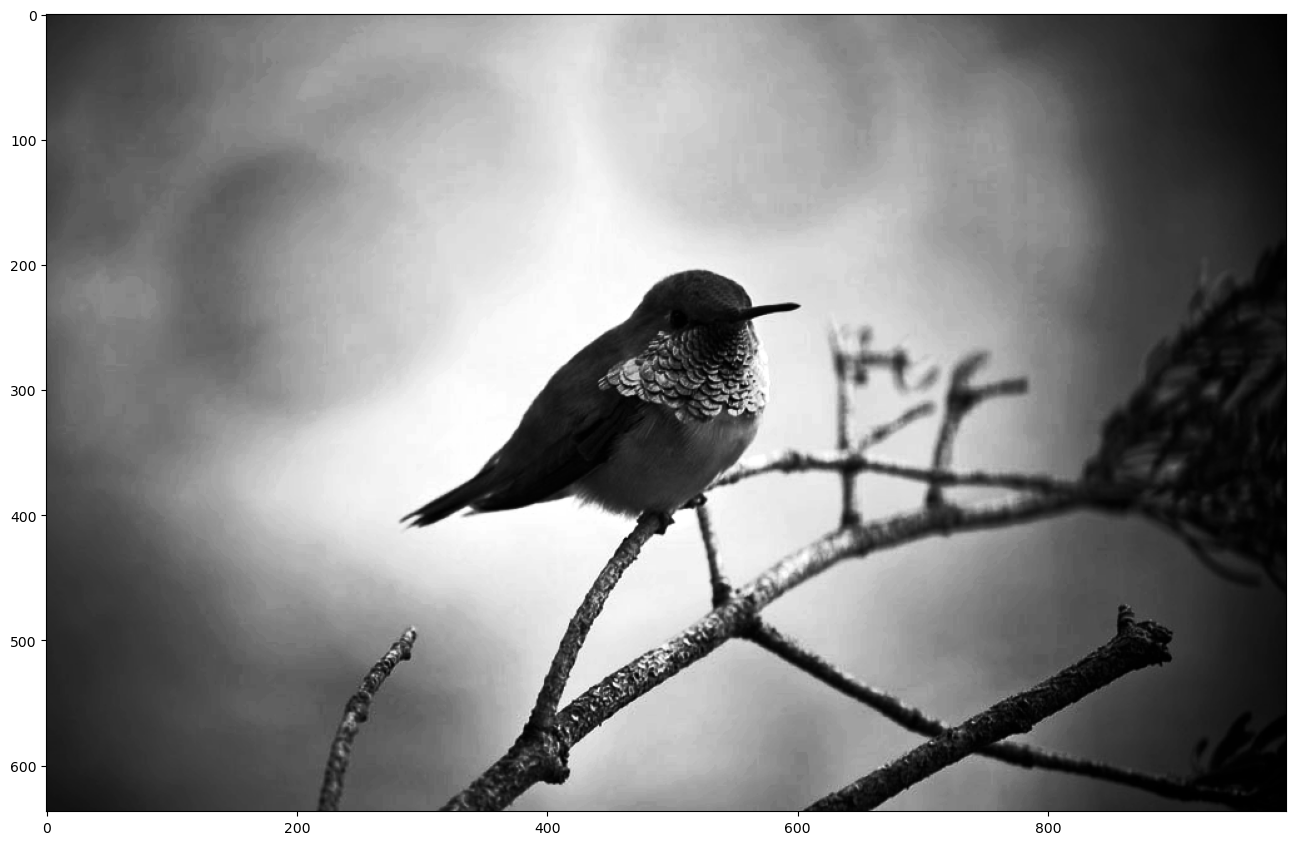

In [9]:
ImageDisplayFunc(ProcessedImage, (16, 12))

### Histogram of processed Grayscale image pixel intensity distribution

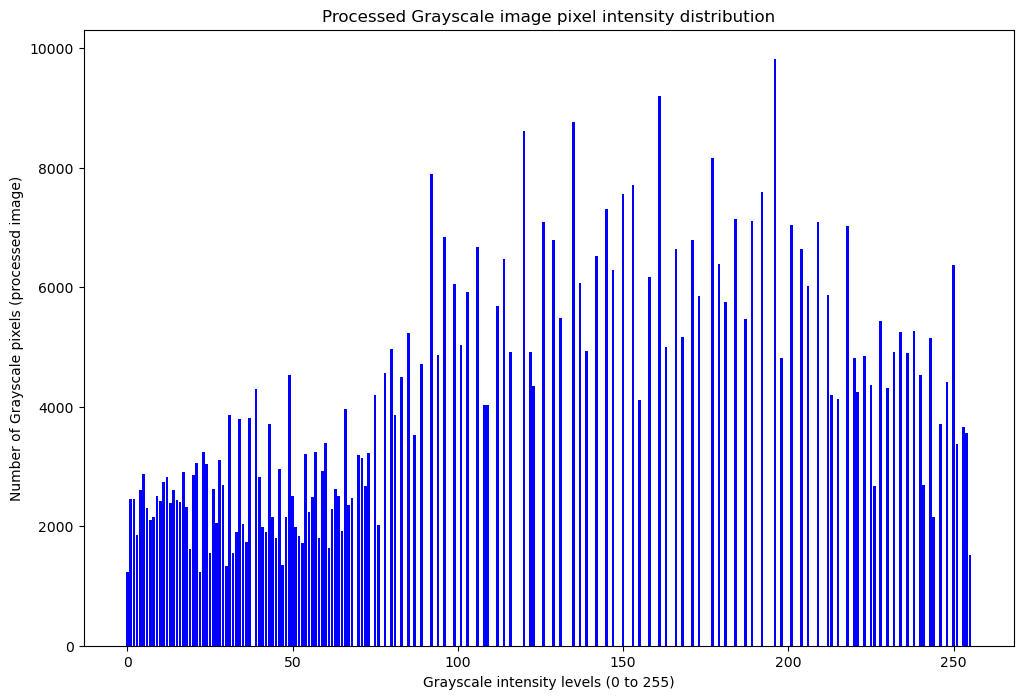

In [10]:
X_axis = GrayscalePixelLevels
Y_axis = NewPixelDistribution

fig = plt.figure(figsize = (12, 8))

plt.bar(X_axis, Y_axis, color = 'blue', width = 0.8)

plt.xlabel('Grayscale intensity levels (0 to 255)')
plt.ylabel('Number of Grayscale pixels (processed image)')
plt.title('Processed Grayscale image pixel intensity distribution')

plt.show()

In [11]:
NewCumulativePixelDistribution = []
NewCumulativeDistributionFunction = []

val = 0

for num in NewPixelDistribution:
    val = val + num
    NewCumulativePixelDistribution.append(val)
    NewCumulativeDistributionFunction.append(round((val / NumberOfPixels), 4))

### Line graph of Cumulative Distribution Function of the processed image

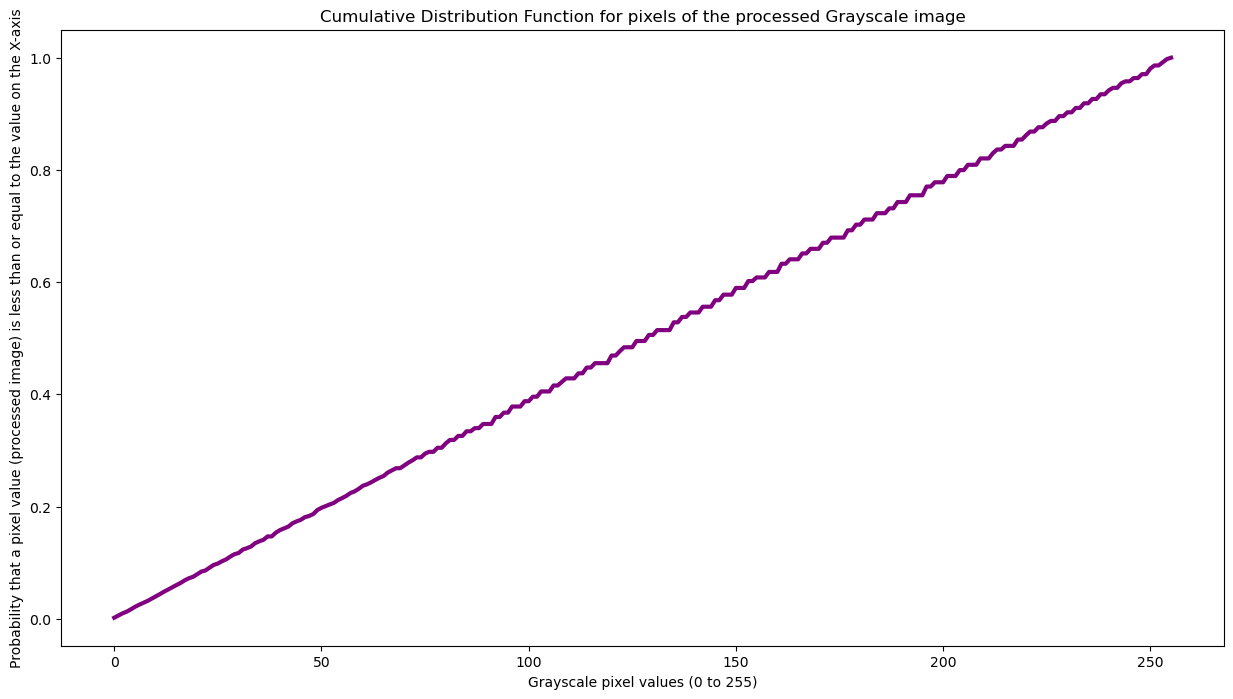

In [12]:
X_axis = GrayscalePixelLevels
Y_axis = NewCumulativeDistributionFunction

fig = plt.figure(figsize = (15, 8))

plt.plot(X_axis, Y_axis, linestyle = '-', linewidth = 3, color = 'purple')

plt.xlabel('Grayscale pixel values (0 to 255)')
plt.ylabel('Probability that a pixel value (processed image) is less than or equal to the value on the X-axis')
plt.title('Cumulative Distribution Function for pixels of the processed Grayscale image')

plt.show()

## Histogram Matching

In [13]:
TargetImg = cv.imread('C:\\Users\\ASHOK\\Desktop\\Python files\\Image Processing\\Grayscale image.jpg')

TargetImageMatrix = list(TargetImg)

ReferenceImg = cv.imread('C:\\Users\\ASHOK\\Desktop\\Python files\\Image Processing\\Grayscale image 2.png')

ReferenceImageMatrix = list(ReferenceImg)

### Target image

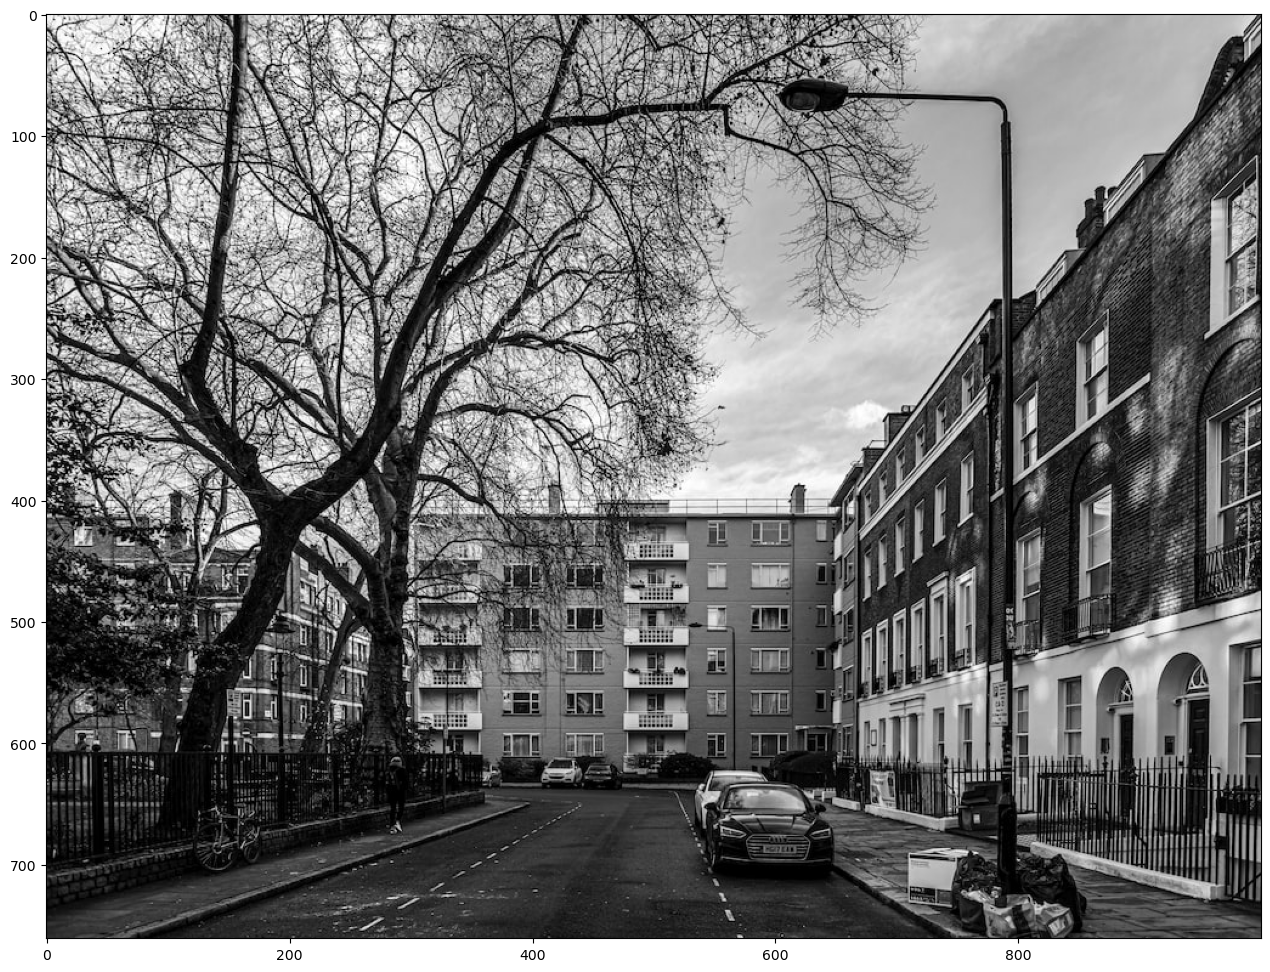

In [14]:
ImageDisplayFunc(TargetImg, (16, 12))

### Reference image

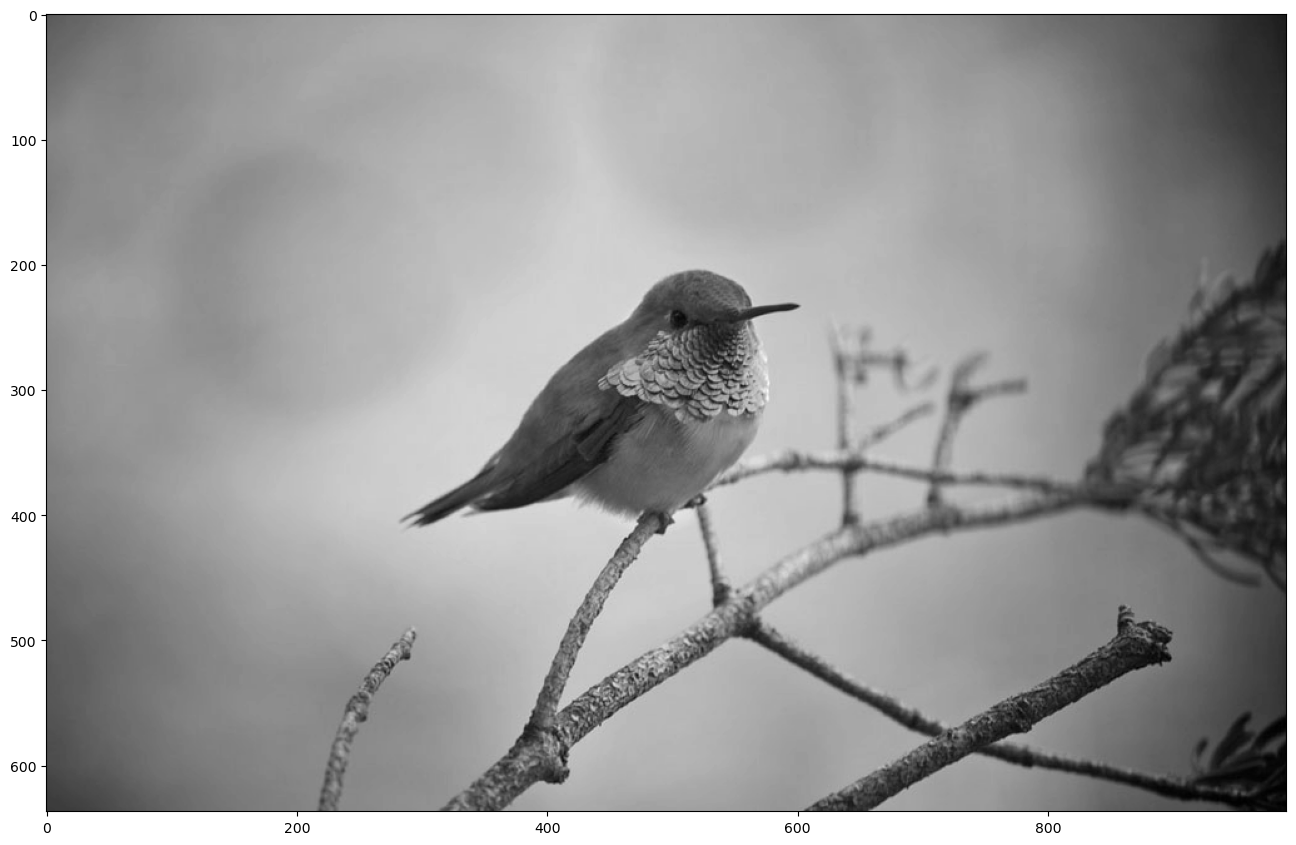

In [15]:
ImageDisplayFunc(ReferenceImg, (16, 12))

In [16]:
def PixelDistributionFunc(image):
    ImageMatrix = list(image)
    
    PixelDistribution = []

    for p in range(0, 256):
        PixelDistribution.append(0)

    for ImageRow in ImageMatrix:
        for pixel in ImageRow:
            GrayLevel = pixel[0]
            PixelDistribution[GrayLevel] = PixelDistribution[GrayLevel] + 1
            
    return PixelDistribution
    

def CumulativePixelDistributionFunc(image):
    PixelDimensions = image.shape
    b = PixelDimensions[0]
    l = PixelDimensions[1]
    NumberOfPixels = l * b
    
    PixelDistribution = PixelDistributionFunc(image)
            
    CumulativePixelDistribution = []
    CumulativeDistributionFunction = []
    val = 0

    for num in PixelDistribution:
        val = val + num
        CumulativePixelDistribution.append(val)
        CumulativeDistributionFunction.append(round((val / NumberOfPixels), 4))
        
    return CumulativePixelDistribution, CumulativeDistributionFunction


def HistogramEqualization(image):        
    ImageMatrix = list(image)
    
    CumulativePixelDistribution, CumulativeDistributionFunction = CumulativePixelDistributionFunc(image)              
            
    OutputGrayLevels = []
    
    for val in CumulativeDistributionFunction:
        level = round(val * 255)
        OutputGrayLevels.append(level)
        
    ProcessedImageMatrix = []
                
    for ImageRow in ImageMatrix:
        ProcessedImageRow = []
        for Pixel in ImageRow:
            NewPixel = []
            OriginalGrayscaleValue = Pixel[0]
            NewGrayscaleValue = OutputGrayLevels[OriginalGrayscaleValue]
            for k in range(0, 3):
                NewPixel.append(NewGrayscaleValue)
            ProcessedImageRow.append(NewPixel)
        ProcessedImageMatrix.append(ProcessedImageRow)
        
    HistogramEqualizedImage = np.array(ProcessedImageMatrix)
    
    return HistogramEqualizedImage


def HistogramMatching(TargetImage, ReferenceImage):
    EqualizedTargetImage = HistogramEqualization(TargetImage)
    EqualizedReferenceImage = HistogramEqualization(ReferenceImage)
    
    EqualizedTargetImageMatrix = list(EqualizedTargetImage)
    
    TargetTuple = CumulativePixelDistributionFunc(EqualizedTargetImage)
    ReferenceTuple = CumulativePixelDistributionFunc(EqualizedReferenceImage)
    
    EqualizedTargetImageCPD = TargetTuple[0]
    EqualizedReferenceImageCPD = ReferenceTuple[0]
    
    OutputGrayLevelsForTargetImage = []
    
    for i in range(0, 10):
        DiffList = []
        for j in range(0, 21):
            diff = abs(EqualizedTargetImageCPD[i] - EqualizedReferenceImageCPD[j])
            DiffList.append(diff)
        DiffList.reverse()
        list_index = 20 - DiffList.index(min(DiffList))
        element_index = list_index
        OutputGrayLevelsForTargetImage.append(element_index)
        
    for i in range(10, 246):
        DiffList = []
        for j in range(i-10, i+11):
            diff = abs(EqualizedTargetImageCPD[i] - EqualizedReferenceImageCPD[j])
            DiffList.append(diff)
        DiffList.reverse()
        list_index = 20 - DiffList.index(min(DiffList))
        element_index = list_index + i - 10
        OutputGrayLevelsForTargetImage.append(element_index)
        
    for i in range(246, 256):
        DiffList = []
        for j in range(235, 256):
            diff = abs(EqualizedTargetImageCPD[i] - EqualizedReferenceImageCPD[j])
            DiffList.append(diff)
        DiffList.reverse()
        list_index = 20 - DiffList.index(min(DiffList))
        element_index = list_index + 235
        OutputGrayLevelsForTargetImage.append(element_index)
    
    ProcessedImageMatrix = []
                
    for ImageRow in EqualizedTargetImageMatrix:
        ProcessedImageRow = []
        for Pixel in ImageRow:
            NewPixel = []
            OriginalGrayscaleValue = Pixel[0]
            NewGrayscaleValue = OutputGrayLevelsForTargetImage[OriginalGrayscaleValue]
            for k in range(0, 3):
                NewPixel.append(NewGrayscaleValue)
            ProcessedImageRow.append(NewPixel)
        ProcessedImageMatrix.append(ProcessedImageRow)
        
    HistogramMatchedTargetImage = np.array(ProcessedImageMatrix)
    
    return HistogramMatchedTargetImage

HistogramMatchedTargetImage = HistogramMatching(TargetImg, ReferenceImg)

### Histogram Matched Target image

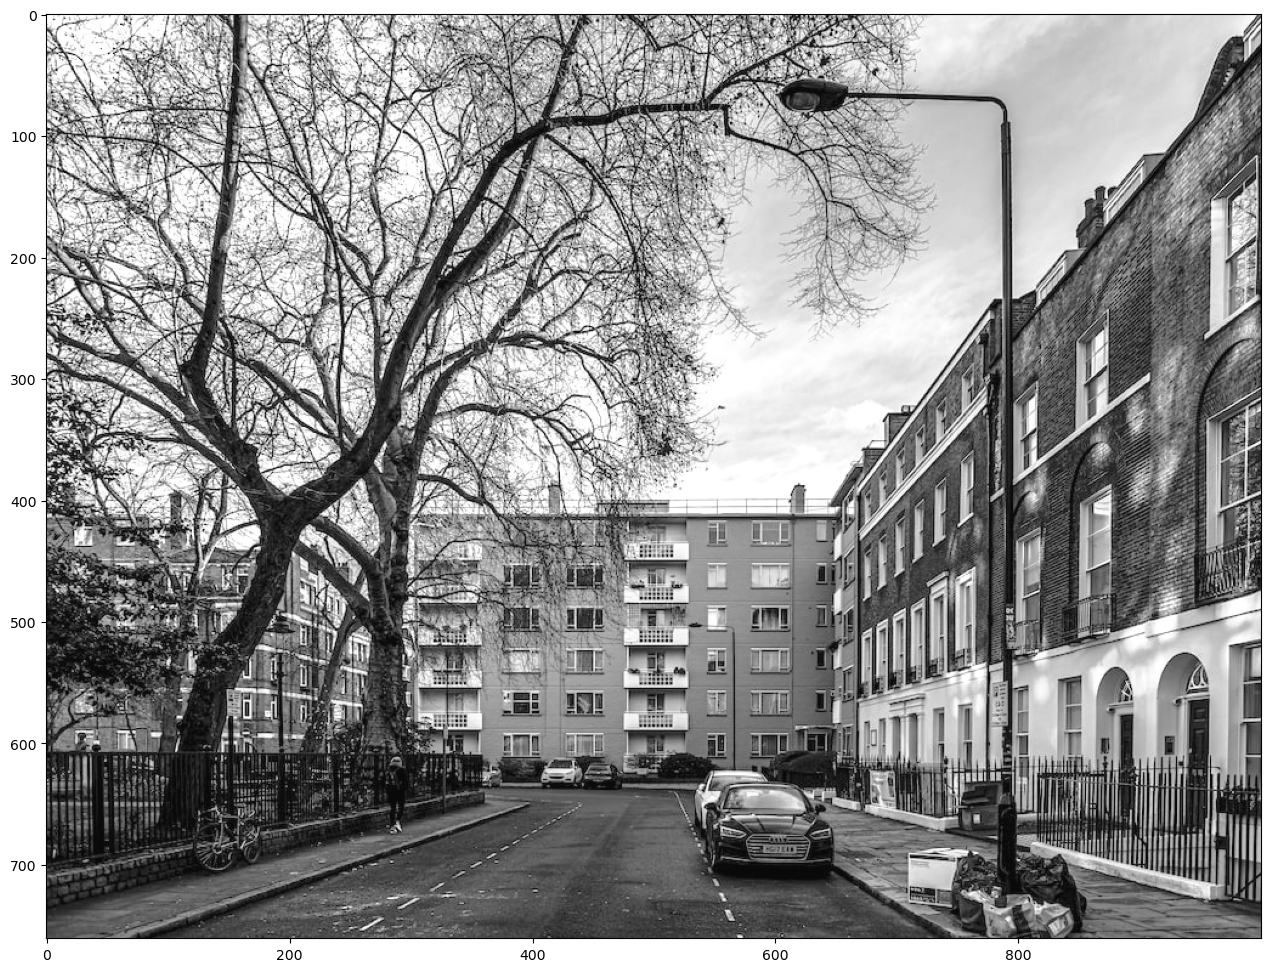

In [17]:
ImageDisplayFunc(HistogramMatchedTargetImage, (16, 12))